# *Regresión lineal simple*

Es un modelo matemático que intenta reproducir la relación de dependencia que existe entre una variable dependiente/respuesta (comúnmente denotada como Y) y una varibale independiente/explicativa (normalmente representada por X). 




COMENTARIO
Este comentario es de prueba


## Librerías

In [ ]:
import numpy as np #Para cálculos
import pandas as pd #Tratamiento de datos - dataframe
import matplotlib.pyplot as plt #Para gráficos

## Datos

In [ ]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'desigualdad_ccaa.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data.head(6))

Saving desigualdad_ccaa.xlsx to desigualdad_ccaa.xlsx
                          CCAA  PIBpc  Rmedper  ...  Empint  Empweb  Empsoc
0                    Andalucía  19633     9160  ...    98.2    71.5    54.3
1                       Aragón  28727    12300  ...    98.3    85.4    64.7
2      Asturias, Principado de  23299    12523  ...    98.1    81.6    61.3
3               Balears, Illes  28213    12410  ...    97.6    81.4    73.0
4                     Canarias  21244     9487  ...    97.8    67.8    62.8
5                    Cantabria  24383    12205  ...    98.6    72.7    65.9

[6 rows x 50 columns]


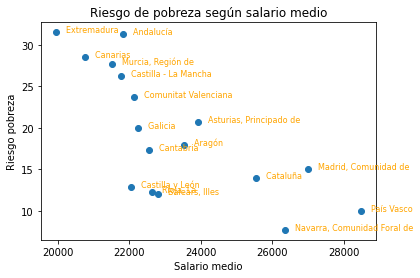

In [ ]:
#Gráfico
x = data['Salmed']
y = data['Riespob']
fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.set_title('Riesgo de pobreza según salario medio')
ax.set_xlabel('Salario medio')
ax.set_ylabel('Riesgo pobreza')

#Para que aparezcan los nombres de las CCAA
for i in range(data.shape[0]): #data.shape[0] es el número de filas del dataset, si fuera data.shape[1] sería el de las columnas
    plt.text(x=data.Salmed[i]+0.3, y=data.Riespob[i], s=data.CCAA[i],
             fontdict=dict(color='orange',size=8))

fig.show()

## Ajuste del modelo

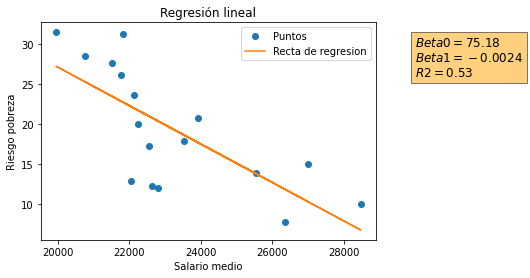

In [ ]:
#Librería
from sklearn.linear_model import LinearRegression

reg =LinearRegression()
reg.fit(x.values.reshape(-1,1),y) # ajuste del modelo

# Calculo de las betas y de r2
b0=(round(reg.intercept_,2))
b1=(round(reg.coef_[0],4))
r2=(round(reg.score(x.values.reshape(-1,1), y),2))

# Gráfico
fig, ax = plt.subplots()
ax.plot(x, y,'o',label='Puntos')
ax.set_xlabel('Salario medio')
ax.set_ylabel('Riesgo pobreza')
ax.plot(x, reg.predict(x.values.reshape(-1,1)), label='Recta de regresion')
ax.legend() #Para la leyenda dentro de la gráfica

#Para insertar la cajita con información adicional
textstr = '\n'.join((
    r'$Beta0=%.2f$' % (b0, ),
    r'$Beta1=%.4f$' % (b1, ),
    r'$R2=%.2f$' % (r2, )))
ax.text(30000,26, textstr, fontsize = 12, bbox=dict(facecolor='orange', alpha=0.5))

ax.set_title('Regresión lineal')
fig.show()
